In [1]:
from edc import print_info
print_info("sh-xcube-datasets")


***Notebook Title***  
Sentinel Hub datasets using XCUBE

***Notebook Description***  
Euro Data Cube Sentinel Hub - datasets


***Notebook Dependencies***  
This notebook requires an active subscription to:
* EDC Sentinel Hub


In [2]:
from edc import check_compatibility
check_compatibility("user-2022.07-00", dependencies=["SH"])



---------

The following environment variables are available:

* `SH_CLIENT_ID`, `SH_INSTANCE_ID`, `SH_CLIENT_NAME`, `SH_CLIENT_SECRET`


## EDC Sentinel Hub - using xcube to access different data sets in Sentinel Hub

This notebook shows how to access different data sets through the Sentinel Hub API:

1. Access **Sentiel-2 L2A** through xcube Sentinel hub Store
2. Access **Sentiel-2 L1C** through xcube Sentinel hub Store
3. Access **Sentiel-1 GRD** through xcube Sentinel hub Store
4. Access **DEM** through xcube Sentinel hub Store
5. Access to a **custom data set** ingested into Sentinel Hub via [**BYOD**](https://www.sentinel-hub.com/bring-your-own-data) mechanism

In [3]:
from xcube_sh.config import CubeConfig
from xcube_sh.cube import open_cube
from xcube_sh.sentinelhub import SentinelHub
import xarray as xr
import numpy as np

In [4]:
x1 = 10.00  # degree
y1 = 54.27  # degree
x2 = 11.00  # degree
y2 = 54.60  # degree

bbox = x1, y1, x2, y2

In [5]:
spatial_res = 0.00018   # = 20.038 meters in degree

In [6]:
SH = SentinelHub()
SH.dataset_names

['DEM',
 'LETML2',
 'S2L1C',
 'LTML1',
 'S2L2A',
 'LTML2',
 'LOTL2',
 'S3OLCI',
 'MODIS',
 'LETML1',
 'LMSSL1',
 'HLS',
 'S5PL2',
 'S3SLSTR',
 'S1GRD',
 'LOTL1',
 'CUSTOM']

## Sentinel-2 L2A

In [7]:
SH.band_names('S2L2A')

['B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B8A',
 'B09',
 'B11',
 'B12',
 'SCL',
 'SNW',
 'CLD',
 'viewZenithMean',
 'viewAzimuthMean',
 'sunZenithAngles',
 'sunAzimuthAngles',
 'AOT',
 'CLM',
 'CLP']

In [8]:
cube_config = CubeConfig(dataset_name='S2L2A',
                         band_names=['SCL'],
                         tile_size=[512, 512],
                         bbox=bbox,
                         spatial_res=spatial_res,
                         time_range=['2018-05-14', '2018-07-31'],
                         time_tolerance='30M')  

/opt/conda/envs/edc-default-2022.07-00/lib/python3.9/site-packages/pandas/core/tools/timedeltas.py:148: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  return _coerce_scalar_to_timedelta_type(arg, unit=unit, errors=errors)


In [9]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (time: 45, lat: 2048, lon: 5632, bnds: 2)
Coordinates:
  * lat        (lat) float64 54.64 54.64 54.64 54.64 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 11.01 11.01 11.01 11.01
  * time       (time) datetime64[ns] 2018-05-15T10:30:24 ... 2018-07-29T10:30:19
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(45, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    SCL        (time, lat, lon) uint8 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2022-10-12T10:08:00.604991
    time_coverage_start:     2018-05-15T10:30:24+00:00
    time_coverage_end:       2018-07-29T10:30:19+00:00
    time_coverage_duration:  P74DT23H59M55S
    geospatial_lon_min:      10.0
    geospatial_lat_min:      54.27
    geospatial_lon_max:      11.01376
    geospatial_lat_max:      54.63864
    processing_level:        L2A

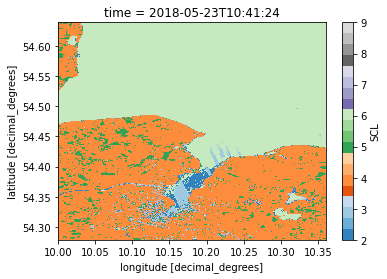

In [10]:
cube.SCL.isel(time=5, lat=slice(0,2000),lon=slice(0,2000)).plot.imshow(cmap='tab20c')

## Sentinel-2 L1C

In [11]:
SH.band_names('S2L1C')

['B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B8A',
 'B09',
 'B10',
 'B11',
 'B12',
 'viewZenithMean',
 'viewAzimuthMean',
 'sunZenithAngles',
 'sunAzimuthAngles',
 'CLM',
 'CLP']

In [12]:
cube_config = CubeConfig(dataset_name='S2L1C',
                         band_names=['B04'],
                         tile_size=[512, 512],
                         bbox=bbox,
                         spatial_res=spatial_res,
                         time_range=['2018-05-14', '2018-07-31'],
                         time_tolerance='30M')  

/opt/conda/envs/edc-default-2022.07-00/lib/python3.9/site-packages/pandas/core/tools/timedeltas.py:148: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  return _coerce_scalar_to_timedelta_type(arg, unit=unit, errors=errors)


In [13]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (time: 45, lat: 2048, lon: 5632, bnds: 2)
Coordinates:
  * lat        (lat) float64 54.64 54.64 54.64 54.64 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 11.01 11.01 11.01 11.01
  * time       (time) datetime64[ns] 2018-05-15T10:30:24 ... 2018-07-29T10:30:19
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(45, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L1C Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2022-10-12T10:08:08.414962
    time_coverage_start:     2018-05-15T10:30:24+00:00
    time_coverage_end:       2018-07-29T10:30:19+00:00
    time_coverage_duration:  P74DT23H59M55S
    geospatial_lon_min:      10.0
    geospatial_lat_min:      54.27
    geospatial_lon_max:      11.01376
    geospatial_lat_max:      54.63864
    processing_level:        L1C

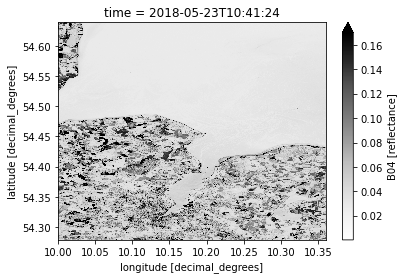

In [14]:
cube.B04.isel(time=5, lat=slice(0,2000),lon=slice(0,2000)).plot.imshow(cmap='Greys', vmax = .17)

## Sentinel-1 GRD

In [15]:
SH.band_names('S1GRD')

['VV', 'HH', 'VH', 'localIncidenceAngle', 'scatteringArea', 'shadowMask', 'HV']

In [16]:
x1 = 10.00  # degree
y1 = 54.27  # degree
x2 = 10.50  # degree
y2 = 54.60  # degree

bbox = x1, y1, x2, y2

In [17]:
spatial_res = 0.00018 

In [18]:
cube_config = CubeConfig(dataset_name='S1GRD',
                         band_names=['VH'],
                         tile_size=[512, 512],
                         crs = "http://www.opengis.net/def/crs/EPSG/0/4326",
                         spatial_res = spatial_res,
                         bbox=bbox,
                         time_range=['2019-05-14', '2019-07-31'],
                         time_period='2D')  

In [19]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (time: 40, lat: 2048, lon: 3072, bnds: 2)
Coordinates:
  * lat        (lat) float64 54.64 54.64 54.64 54.64 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 10.55 10.55 10.55 10.55
  * time       (time) datetime64[ns] 2019-05-15 2019-05-17 ... 2019-08-01
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(40, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    VH         (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.7
    title:                     S1GRD Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2022-10-12T10:08:18.516281
    time_coverage_start:       2019-05-14T00:00:00+00:00
    time_coverage_end:         2019-08-02T00:00:00+00:00
    ...                        ...
    time_coverage_resolution:  P2DT0H0M0S
    geospatial_lon_min:        10.0
    geospatial_lat_min:        54.27
    geospatial_lon_max:        10.55296
    geospatial_lat_max:        54.63864
    processing_level:          L1B

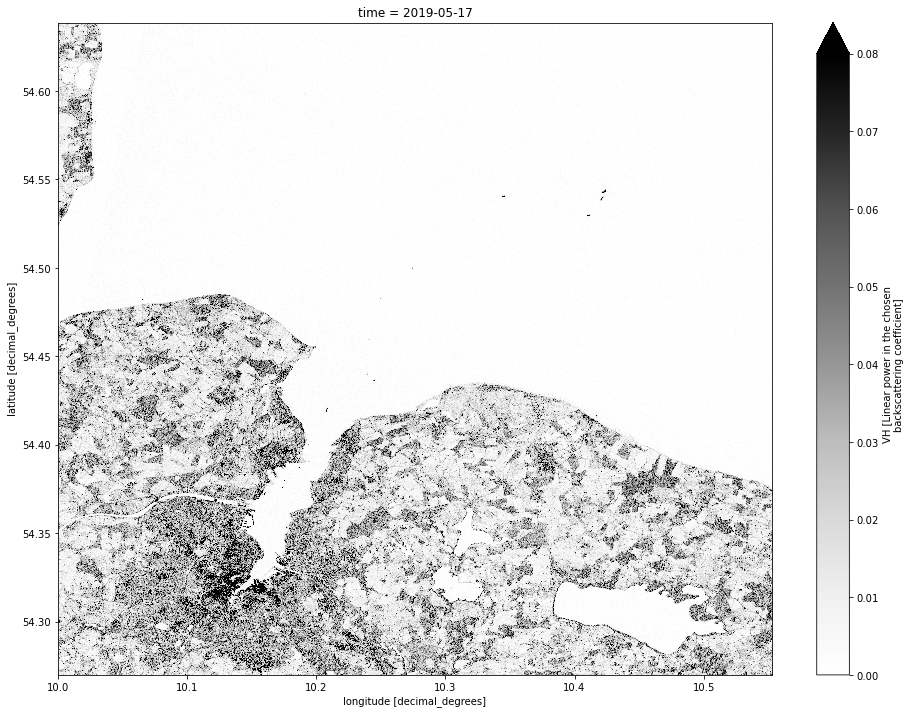

In [20]:
cube.VH.isel(time=1).plot.imshow(cmap='Greys',vmax =0.08, figsize = [16,12])

In [21]:
SH.dataset_names

['S3SLSTR',
 'MODIS',
 'DEM',
 'LMSSL1',
 'LETML1',
 'S2L1C',
 'LOTL1',
 'LTML2',
 'S3OLCI',
 'S2L2A',
 'CUSTOM',
 'LTML1',
 'LOTL2',
 'S1GRD',
 'LETML2',
 'HLS',
 'S5PL2']

## Digital Elevation Model

In [22]:
SH.band_names('DEM')

['DEM']

In [23]:
x1 = 10.00  # degree
y1 = 54.27  # degree
x2 = 10.50  # degree
y2 = 54.40  # degree

bbox = x1, y1, x2, y2

In [24]:
spatial_res = 0.0002

In [25]:
cube_config = CubeConfig(dataset_name='DEM',
                         band_names=['DEM'],
                         tile_size=[512, 512],
                         crs = "http://www.opengis.net/def/crs/EPSG/0/4326",
                         spatial_res = spatial_res,
                         bbox=bbox,
                         time_range=['2019-05-14', '2019-07-31'],
                         time_period='100D')  

In [26]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (time: 1, lat: 650, lon: 2560, bnds: 2)
Coordinates:
  * lat        (lat) float64 54.4 54.4 54.4 54.4 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 10.51 10.51 10.51 10.51
  * time       (time) datetime64[ns] 2019-07-03
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    DEM        (time, lat, lon) float32 dask.array<chunksize=(1, 650, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     DEM Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2022-10-12T10:08:34.266682
    time_coverage_start:       2019-05-14T00:00:00+00:00
    time_coverage_end:         2019-08-22T00:00:00+00:00
    time_coverage_duration:    P100DT0H0M0S
    time_coverage_resolution:  P100DT0H0M0S
    geospatial_lon_min:        10.0
    geospatial_lat_min:        54.27
    geospatial_lon_max:        10.512
    geospatial_lat_max:        54.400000000000006

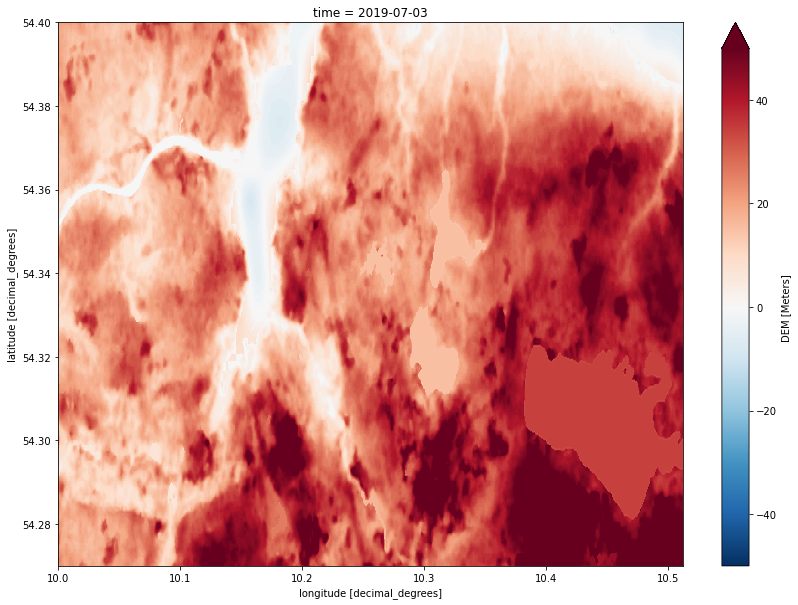

In [27]:
cube.DEM.isel(time=0).plot.imshow(vmin = -50, figsize = [14,10])

## Bring your own data

#### Define bounding box in Mercator coordinates

In [28]:
x1 = 1545577  # meters
y1 = 5761986  # meters
x2 = 1705367  # meters
y2 = 5857046  # meters

bbox = x1, y1, x2, y2

In [29]:
width = 512
spatial_res = (x2 - x1) / width
height = max(1, round((y2 - y1) / spatial_res))

#### Custom data set contains bands B04 (red band), B03 (green band), and B02 (blue band). 

In [30]:
cube_config = CubeConfig(dataset_name='CUSTOM',
                         band_names=['B04', 'B03', 'B02'],                        
                         tile_size=[width, height],
                         crs='http://www.opengis.net/def/crs/EPSG/0/3857',
                         bbox=bbox,
                         time_range=['2020-01-01', '2021-01-01'],
                         time_period='7d',
                         spatial_res=spatial_res,
                         band_sample_types='UINT16',
                         collection_id='484d8dbb-9e3e-41f2-b96b-35189d3ae37f')

In [31]:
cube = open_cube(cube_config)
cube 

<xarray.Dataset>
Dimensions:    (time: 53, y: 305, x: 512, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-04T12:00:00 ... 2021-01-02T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(53, 2), meta=np.ndarray>
  * x          (x) float64 1.546e+06 1.546e+06 1.546e+06 ... 1.705e+06 1.705e+06
  * y          (y) float64 5.857e+06 5.857e+06 5.856e+06 ... 5.762e+06 5.762e+06
Dimensions without coordinates: bnds
Data variables:
    B02        (time, y, x) uint16 dask.array<chunksize=(1, 305, 512), meta=np.ndarray>
    B03        (time, y, x) uint16 dask.array<chunksize=(1, 305, 512), meta=np.ndarray>
    B04        (time, y, x) uint16 dask.array<chunksize=(1, 305, 512), meta=np.ndarray>
    crs        int64 ...
Attributes:
    Conventions:               CF-1.7
    title:                     CUSTOM Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2022-10-12T10:08:37.913577
    time_coverage_start:       2020-01-01T00:00:00+00:00
    time_coverage_end:         2021-01-06T00:00:00+00:00
    time_coverage_duration:    P371DT0H0M0S
    time_coverage_resolution:  P7DT0H0M0S

In [32]:
cubew = cube.isel(time=26)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


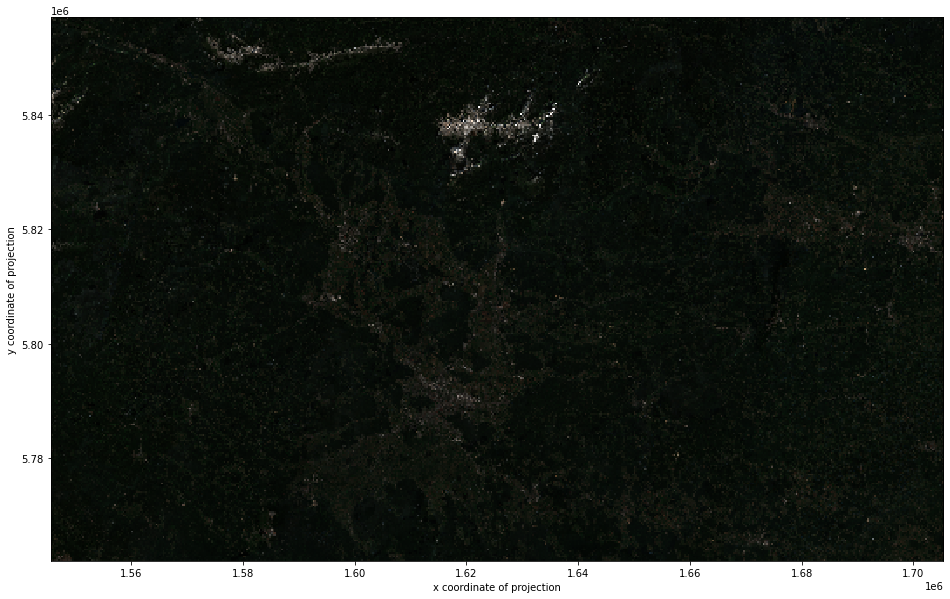

In [33]:
rgb_data = np.zeros((305, 512, 3), 'uint16')
rgb_data[:, :, 0] = cubew.B04.values/10000*255
rgb_data[:, :, 1] = cubew.B03.values/10000*255
rgb_data[:, :, 2] = cubew.B02.values/10000*255

rgb_array = xr.DataArray(rgb_data, dims=('y', 'x', 'b'), coords=dict(x=cube.B04.x, y=cube.B04.y))
rgb_array.plot.imshow(rgb='b', figsize=(16, 10))

In [34]:
rgb_array

<xarray.DataArray (y: 305, x: 512, b: 3)>
array([[[70, 66, 57],
        [15, 18, 10],
        [20, 25, 16],
        ...,
        [ 9, 14, 10],
        [ 7, 10,  7],
        [ 7, 11,  8]],

       [[18, 20, 12],
        [40, 41, 34],
        [44, 46, 37],
        ...,
        [ 7, 13,  9],
        [ 5,  9,  6],
        [ 6, 11,  8]],

       [[ 4,  9,  4],
        [10, 11,  7],
        [ 4,  8,  5],
        ...,
...
        ...,
        [11, 15,  9],
        [23, 22, 13],
        [20, 20, 13]],

       [[ 6, 17,  6],
        [ 0, 10,  0],
        [ 7,  9,  0],
        ...,
        [34, 26, 18],
        [17, 23, 14],
        [20, 22, 13]],

       [[26, 25, 19],
        [13, 16,  9],
        [30, 26, 21],
        ...,
        [12, 17, 10],
        [25, 24, 15],
        [11, 19, 10]]], dtype=uint16)
Coordinates:
  * x        (x) float64 1.546e+06 1.546e+06 1.546e+06 ... 1.705e+06 1.705e+06
  * y        (y) float64 5.857e+06 5.857e+06 5.856e+06 ... 5.762e+06 5.762e+06
Dimensions without coordinates: b